<a href="https://colab.research.google.com/github/FANTASY000666/Fantasy_AI/blob/main/Fantasy_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

import statistics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from google.colab import drive

# xgboost popular gradient boosting library for increase perfomance and speed
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras import layers
from tensorflow.keras import losses
from tqdm import tqdm

import nltk
from nltk.tokenize import word_tokenize

from textblob import TextBlob

nltk.download('punkt')  # Download the punkt tokenizer data


# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Ran the import statements.


In [2]:
#@title Print the version of tf for compatibility
print(tf.__version__)

2.15.0


In [3]:
#@title Exploring the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/generated dataset.csv')
print(df.head())
print(df.tail())

# 1 for AI generated and 0 for human generated


                                                Text  Label
0  Dear Florida State Senator, Although many coul...      0
1  Thousands of people around the world use cars....      0
2  Although numerous amounts of people want to ba...      0
3  There are many different things that you could...      0
4  Dear Senator, The Electoral College as controv...      0
                                                  Text  Label
995    Pioneering Sustainable Urban Living  In an e...      1
996    The Path to Sustainable Urban Living  In an ...      1
997    A Paradigm Shift in Urban Living  In an era ...      1
998    Revolutionizing Urban Living  In an age defi...      1
999    Pioneering Sustainable Urban Living  In an a...      1


In [4]:
#@title Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1000 non-null   object
 1   Label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
#@title check for null values
print(df.isnull().sum())

# no null values

Text     0
Label    0
dtype: int64


In [6]:
#@ creating a copy of the dataset
df_copy = df.copy()
df_copy.head()


,Text,Label
0,"Dear Florida State Senator, Although many coul...",0
1,Thousands of people around the world use cars....,0
2,Although numerous amounts of people want to ba...,0
3,There are many different things that you could...,0
4,"Dear Senator, The Electoral College as controv...",0


In [7]:
#@title Balancing the dataset
df_label_human = df_copy[df_copy['Label'] == 0]
df_label_AI = df_copy[df_copy['Label'] == 1]

print(len(df_label_human))
print(len(df_label_AI))

# our dataset is balanced with 500 human examples and 500 AI examples

500
500


In [8]:
#@title converting the column 'Text' and 'Label' of D.F to lists

text = df_copy.iloc[100]['Text']
texts = df_copy['Text'].tolist()
labels = df_copy['Label'].tolist()

#printing to inspect the data
print(text, '\n')
print(texts[-10], '\n')
print(labels[5], '\n')
print(len(texts), '\t', len(labels))

Every day people wake up, get ready, and go to work or school. The way they get there can vary but for the most part, people drive cars. That's about to change. Helping the environment and becoming more relaxed are advantages for limiting car usage.

By reducing car usage, emmitions produced from automobiles can be reduced and help the environment. When cars release gas into the air, it causes smog which traps the gases and inhibits them from being able to escape the atmosphere. In largely congested cities smog can be as harmful as 147 micrograms of particulate matter as seen in Paris, France paragraph 17. Paris enforced a partial driving ban due the amount of smog and just after one day of reduced driving, the smog clears enough so they didn't have to enforce the ban another day paragraph 19. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe and up to 50 percent in the United States. paragraph 5. This staggering statistic can open your eyes to how muc

In [9]:
#@title Number of Sentences
def count_sentences_total(text):
    paragraphs = text.split('\n\n')
    paragraphs = [p for p in paragraphs if p.strip()]

    total_sentence_count = 0

    for paragraph in paragraphs:
        sentences = re.split(r'[.?!+]', paragraph)
        sentences = [s for s in sentences if s.strip()]
        total_sentence_count += len(sentences)

    return total_sentence_count

total_sentence_count = count_sentences_total(text)
print(total_sentence_count)

33


In [10]:
#@title Counting number of words
def count_total_words(text):
    paragraphs = text.split('\n\n')
    paragraphs = [p for p in paragraphs if p.strip()]

    total_word_count = 0

    for paragraph in paragraphs:
        sentences = re.split(r'[.?!+]', paragraph)
        for sentence in sentences:
            words = sentence.split()
            total_word_count += len(words)

    return total_word_count

total_word_count = count_total_words(text)
print(total_word_count)



560


In [11]:
#@title Total number of parantheses
def detect_total_parantheses(text):
    paragraphs = text.split('\n\n')

    total_parantheses_presence = 0

    for paragraph in paragraphs:
        if '(' in paragraph or ')' in paragraph:
            total_parantheses_presence += 1

    return total_parantheses_presence

total_parantheses_presence = detect_total_parantheses(text)
print(total_parantheses_presence)


0


In [12]:
#@title Number of dashes
def detect_total_dash(text):
    paragraphs = text.split('\n\n')

    total_dash_presence = 0

    for paragraph in paragraphs:
        if '-' in paragraph:
            total_dash_presence += 1

    return total_dash_presence

total_dash_presence = detect_total_dash(text)
print(total_dash_presence)

0


In [13]:
#@title Total number of colons and semicolons
def detect_total_semicolon_colon(text):
    paragraphs = text.split('\n\n')

    total_punctuation_presence = 0

    for paragraph in paragraphs:
        if ';' in paragraph or ':' in paragraph:
            total_punctuation_presence += 1

    return total_punctuation_presence

total_semicolon_colon_presence = detect_total_semicolon_colon(text)
print(total_semicolon_colon_presence)

0


In [14]:
#@title Total Number of question marks
def detect_total_question_mark(text):
    paragraphs = text.split('\n\n')

    total_question_mark_presence = 0

    for paragraph in paragraphs:
        if '?' in paragraph:
            total_question_mark_presence += 1

    return total_question_mark_presence

total_question_mark_presence = detect_total_question_mark(text)
print(total_question_mark_presence)

0


In [15]:
#@title Total number of Apostrophes
def detect_total_apostrophe(text):
    paragraphs = text.split('\n\n')

    total_apostrophe_presence = 0

    for paragraph in paragraphs:
        if "'" in paragraph:
            total_apostrophe_presence += 1

    return total_apostrophe_presence

total_apostrophe_presence = detect_total_apostrophe(text)
print(total_apostrophe_presence)

3


In [16]:
#@title Calculating the standard deviation of sentence lenghts entire text
def total_std_dev_sentence_length(text):
    paragraphs = text.split('\n\n')

    all_sentence_lengths = []

    for paragraph in paragraphs:
        sentences = re.split(r'[.?!]+', paragraph)
        sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip()]
        all_sentence_lengths.extend(sentence_lengths)

    if len(all_sentence_lengths) > 1:
        total_std_dev = statistics.stdev(all_sentence_lengths)
        total_std_dev = round(total_std_dev, 2)
    else:
        total_std_dev = 0  # if not enough sentences

    return total_std_dev

total_std_dev = total_std_dev_sentence_length(text)
print(total_std_dev)

10.19


In [17]:
#@title Calculating the difference in mean sentence lenght per consequtive paragraphs
def total_mean_diff_sentence_length(text):
    paragraphs = text.split('\n\n')

    all_sentence_lengths = []

    for paragraph in paragraphs:
        sentences = re.split(r'[.?!]+', paragraph)
        sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip()]
        all_sentence_lengths.extend(sentence_lengths)

    differences = [abs(all_sentence_lengths[i] - all_sentence_lengths[i+1]) for i in range(len(all_sentence_lengths) - 1)]

    if differences:
        total_mean_diff = statistics.mean(differences)
        total_mean_diff = round(total_mean_diff, 2)
    else:
        total_mean_diff = 0  # handle where no consecutive sentences or only empty sentences are present.

    return total_mean_diff

total_mean_diff = total_mean_diff_sentence_length(text)
print(total_mean_diff)


10.81


In [18]:
#@title detecting presence of short Sentences
def detect_total_short_sentences(text):
    paragraphs = text.split('\n\n')

    has_short_sentence = any(any(len(sentence.split()) < 11 for sentence in re.split(r'[.?!]+', paragraph) if sentence.strip()) for paragraph in paragraphs)

    return 1 if has_short_sentence else 0

total_short_sentence_presence = detect_total_short_sentences(text)
print(total_short_sentence_presence)

1


In [19]:
#@title Detecting long sentences in the paragraph
def detect_total_long_sentences(text):
    paragraphs = text.split('\n\n')

    has_long_sentence = any(any(len(sentence.split()) > 34 for sentence in re.split(r'[.?!]+', paragraph) if sentence.strip()) for paragraph in paragraphs)

    return 1 if has_long_sentence else 0

total_long_sentence_presence = detect_total_long_sentences(text)
print(total_long_sentence_presence)

1


In [20]:
#@title Checking if there is a number in the entire text
def detect_total_numbers(text):
    paragraphs = text.split('\n\n')

    has_number = any(any(char.isdigit() for char in paragraph) for paragraph in paragraphs)

    return 1 if has_number else 0

total_number_presence = detect_total_numbers(text)
print(total_number_presence)

1


In [21]:
#@title Checks the ratio of capital letters to periods
def detect_total_capital_vs_periods(text):
    paragraphs = text.split('\n\n')

    has_condition = any(sum(1 for char in paragraph if char.isupper()) >= 2 * paragraph.count('.') for paragraph in paragraphs)

    return 1 if has_condition else 0

total_capital_vs_period_presence = detect_total_capital_vs_periods(text)
print(total_capital_vs_period_presence)

1


In [22]:
#@title Performimg sentence tokenization
def tokenize_text(text):
    paragraphs = text.split('\n\n')
    paragraphs = [p.strip() for p in paragraphs if p.strip()]

    # Tokenize words in each sentence of each paragraph
    tokenized_text = []
    for paragraph in paragraphs:
        sentences = re.split(r'[.?!+]', paragraph)
        sentences = [s.strip() for s in sentences if s.strip()]

        tokenized_sentences = []
        for sentence in sentences:
            words = sentence.split()
            words = [w.strip() for w in words if w.strip()]
            tokenized_sentences.append(words)

        tokenized_text.append(tokenized_sentences)

    return tokenized_text

tokenized_text = tokenize_text(text)
print(tokenized_text)

[[['Every', 'day', 'people', 'wake', 'up,', 'get', 'ready,', 'and', 'go', 'to', 'work', 'or', 'school'], ['The', 'way', 'they', 'get', 'there', 'can', 'vary', 'but', 'for', 'the', 'most', 'part,', 'people', 'drive', 'cars'], ["That's", 'about', 'to', 'change'], ['Helping', 'the', 'environment', 'and', 'becoming', 'more', 'relaxed', 'are', 'advantages', 'for', 'limiting', 'car', 'usage']], [['By', 'reducing', 'car', 'usage,', 'emmitions', 'produced', 'from', 'automobiles', 'can', 'be', 'reduced', 'and', 'help', 'the', 'environment'], ['When', 'cars', 'release', 'gas', 'into', 'the', 'air,', 'it', 'causes', 'smog', 'which', 'traps', 'the', 'gases', 'and', 'inhibits', 'them', 'from', 'being', 'able', 'to', 'escape', 'the', 'atmosphere'], ['In', 'largely', 'congested', 'cities', 'smog', 'can', 'be', 'as', 'harmful', 'as', '147', 'micrograms', 'of', 'particulate', 'matter', 'as', 'seen', 'in', 'Paris,', 'France', 'paragraph', '17'], ['Paris', 'enforced', 'a', 'partial', 'driving', 'ban', 'd

In [23]:
#@ title Analyzing the sentiment of the entire text
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon.
nltk.download('vader_lexicon')


def analyze_sentiment(text):
    # Initialize VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Calculate compound sentiment score for the entire text
    sentiment_score = sia.polarity_scores(text)['compound']

    # Classify sentiment based on the compound score
    if sentiment_score >= 0.05:
        sentiment = 1 # for positive
    elif sentiment_score <= -0.05:
        sentiment = -1 # for negative
    else:
        sentiment = 0

    return sentiment

sentiment = analyze_sentiment(text)
print(sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


1


In [24]:
#@title Checking for specific words
def detect_word_although_total(text):
    paragraphs = text.split('\n\n')
    has_word_although = any('although' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_although else 0

def detect_word_however_total(text):
    paragraphs = text.split('\n\n')
    has_word_however = any('however' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_however else 0

def detect_word_but_total(text):
    paragraphs = text.split('\n\n')
    has_word_but = any('but' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_but else 0

def detect_word_because_total(text):
    paragraphs = text.split('\n\n')
    has_word_because = any('because' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_because else 0

def detect_word_this_total(text):
    paragraphs = text.split('\n\n')
    has_word_this = any('this' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_this else 0

def detect_word_others_researchers_total(text):
    paragraphs = text.split('\n\n')
    has_word_others_researchers = any('others' in paragraph.lower() or 'researchers' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_others_researchers else 0

def detect_word_etc_total(text):
    paragraphs = text.split('\n\n')
    has_word_etc = any('etc.' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_etc else 0

def detect_word_in_conclusion_total(text):
    paragraphs = text.split('\n\n')
    has_word_in_conclusion = any('conclusion' in paragraph.lower() for paragraph in paragraphs)
    return 1 if has_word_in_conclusion else 0

In [25]:
#@title Looping through all texts
results = []
# tqdm is used to display a progress bar for the iteration
for text in tqdm(texts):
    result = {
        'total_number_sentences': count_sentences_total(text),
        'total_number_words': count_total_words(text),
        'total_number_parantheses': detect_total_parantheses(text),
        'total_number_dash': detect_total_dash(text),
        'total_colons': detect_total_semicolon_colon(text),
        'total_number_questionmark': detect_total_question_mark(text),
        'total_number_apostrophe': detect_total_apostrophe(text),
        'std_dev_sentence_length': total_std_dev_sentence_length(text),
        'mean_diff_consecutive_sentence': total_mean_diff_sentence_length(text),
        'short_sentence_presence': detect_total_short_sentences(text),
        'long_sentence_presence': detect_total_long_sentences(text),
        'numbers_presence': detect_total_numbers(text),
        'capital_vs_period_presence': detect_total_capital_vs_periods(text),
        'word_although_presence': detect_word_although_total(text),
        'word_however_presence': detect_word_however_total(text),
        'word_but_presence': detect_word_but_total(text),
        'word_this_presence': detect_word_this_total(text),
        'word_others_researchers_presence': detect_word_others_researchers_total(text),
        'word_et_presence': detect_word_etc_total(text),
        'word_inconclusion_presence': detect_word_in_conclusion_total(text),
        #'Tokenized_text': tokenize_text(text),
        'Sentiment': analyze_sentiment(text),
        # 'label': df_copy['Label']
    }
    results.append(result)


100%|██████████| 1000/1000 [00:16<00:00, 59.82it/s]


In [26]:
#@title Converting the results to a dataFrame to use as feature
dataFrame_features = pd.DataFrame(results)
print(len(dataFrame_features))
dataFrame_features ['LABEL']= df_copy['Label']
dataFrame_features.head()
dataFrame_features.tail()



1000


,total_number_sentences,total_number_words,total_number_parantheses,total_number_dash,total_colons,total_number_questionmark,total_number_apostrophe,std_dev_sentence_length,mean_diff_consecutive_sentence,short_sentence_presence,...,capital_vs_period_presence,word_although_presence,word_however_presence,word_but_presence,word_this_presence,word_others_researchers_presence,word_et_presence,word_inconclusion_presence,Sentiment,LABEL
995,23,519,0,1,1,0,0,10.3,12.6,1,...,1,0,1,1,1,0,0,1,1,1
996,22,511,0,1,1,0,0,10.4,13.2,1,...,1,0,1,1,1,0,0,1,1,1
997,23,511,0,1,1,0,0,9.9,12.7,1,...,1,0,1,0,1,0,0,1,1,1
998,24,507,0,1,1,0,0,8.1,10.0,1,...,1,0,1,1,1,0,0,1,1,1
999,23,492,0,1,1,0,0,9.0,10.6,1,...,1,0,1,1,1,0,0,1,1,1


In [27]:
#@title Perfoming correlation to see what features can be used to best train the model
# a correaltion analysis was performed and if a feature had a correlation of more
# than o.5 to the label it was used as a feature to train the model.
df_correlated = dataFrame_features.corr()
#print(df_correlated, '\n')
df_correlated.tail()

,total_number_sentences,total_number_words,total_number_parantheses,total_number_dash,total_colons,total_number_questionmark,total_number_apostrophe,std_dev_sentence_length,mean_diff_consecutive_sentence,short_sentence_presence,...,capital_vs_period_presence,word_although_presence,word_however_presence,word_but_presence,word_this_presence,word_others_researchers_presence,word_et_presence,word_inconclusion_presence,Sentiment,LABEL
word_others_researchers_presence,0.1,0.1,NaN,-0.3,-0.2,0.1,0.2,0.2,0.1,-0.0,...,-0.1,0.2,-0.1,-0.0,-0.1,1.0,0.1,-0.2,-0.1,-0.3
word_et_presence,0.1,0.1,NaN,-0.2,0.0,0.1,0.2,0.1,0.0,-0.0,...,-0.0,0.0,-0.1,0.0,-0.1,0.1,1.0,-0.1,-0.0,-0.2
word_inconclusion_presence,-0.3,-0.2,NaN,0.8,0.4,-0.4,-0.6,-0.2,-0.0,0.1,...,0.1,-0.3,0.4,-0.1,0.2,-0.2,-0.1,1.0,0.2,0.8
Sentiment,-0.1,-0.0,NaN,0.3,0.1,-0.2,-0.2,-0.1,-0.1,0.0,...,0.1,-0.1,0.2,-0.1,0.1,-0.1,-0.0,0.2,1.0,0.3
LABEL,-0.4,-0.2,NaN,1.0,0.5,-0.4,-0.8,-0.2,-0.0,0.2,...,0.2,-0.3,0.5,-0.1,0.3,-0.3,-0.2,0.8,0.3,1.0


In [28]:
correlation_matrix = dataFrame_features ['numbers_presence'].corr(dataFrame_features['LABEL'])
print(correlation_matrix)


-0.9008852329229001



# we will use:
# total_number dash, total_colons, total_number_apostrophe, numbers_presence,
# word_however_presence and word_inconclusion_presence

#The correlation threshold used was 0.5/-0.5

In [29]:
#@title splitting the dataFrame_features into train and test data
train_df = dataFrame_features.sample(frac=0.9, random_state=42)
test_df= dataFrame_features.drop(train_df.index)

# shuffle the training set to avoid overfitting and prevent bias introduced by sequency of the data
train_df = train_df.reindex(np.random.permutation(train_df.index))

train_df.head()
test_df.tail()

,total_number_sentences,total_number_words,total_number_parantheses,total_number_dash,total_colons,total_number_questionmark,total_number_apostrophe,std_dev_sentence_length,mean_diff_consecutive_sentence,short_sentence_presence,...,capital_vs_period_presence,word_although_presence,word_however_presence,word_but_presence,word_this_presence,word_others_researchers_presence,word_et_presence,word_inconclusion_presence,Sentiment,LABEL
937,24,501,0,1,1,0,0,7.2,8.8,1,...,1,0,1,1,1,0,0,1,1,1
955,27,512,0,1,1,0,0,7.1,8.4,1,...,1,0,0,1,1,0,0,1,1,1
980,26,513,0,1,1,0,0,6.5,7.0,1,...,1,0,1,0,1,0,0,1,1,1
982,23,519,0,1,1,0,0,10.3,12.6,1,...,1,0,1,1,1,0,0,1,1,1
992,28,575,0,1,1,0,1,6.6,6.7,1,...,1,0,0,1,1,0,0,1,1,1


In [30]:
# @title Calulating the z-scores in the train set
# Calculate the z-scores of each column in the training set and
# write those z-scores in a new pandas DataFrame named train_df_norm.
label_column = 'LABEL'

# Select columns for normalization (excluding the label column)
columns_to_normalize = train_df.columns[train_df.columns != label_column]

# Calculate mean and standard deviation for the selected columns
train_df_mean = train_df[columns_to_normalize].mean()
train_df_std = train_df[columns_to_normalize].std()

# Calculate z-scores for the selected columns
train_df_norm = (train_df[columns_to_normalize] - train_df_mean) / train_df_std

# Combine the normalized columns with the non-normalized ones, including the label
train_df_norm_with_label = pd.concat([train_df[label_column], train_df_norm], axis=1)

# Examine some of the values of the normalized training set
print("Standard DEV \n", train_df_std, "\n")
print("Mean \n", train_df_mean, "\n")
train_df_norm_with_label.head()

Standard DEV 
 total_number_sentences               7.2
total_number_words                 129.1
total_number_parantheses             0.0
total_number_dash                    0.5
total_colons                         0.6
                                    ... 
word_this_presence                   0.2
word_others_researchers_presence     0.3
word_et_presence                     0.2
word_inconclusion_presence           0.5
Sentiment                            0.6
Length: 21, dtype: float64 

Mean 
 total_number_sentences              26.6
total_number_words                 541.6
total_number_parantheses             0.0
total_number_dash                    0.5
total_colons                         0.7
                                    ... 
word_this_presence                   0.9
word_others_researchers_presence     0.1
word_et_presence                     0.0
word_inconclusion_presence           0.6
Sentiment                            0.8
Length: 21, dtype: float64 



,LABEL,total_number_sentences,total_number_words,total_number_parantheses,total_number_dash,total_colons,total_number_questionmark,total_number_apostrophe,std_dev_sentence_length,mean_diff_consecutive_sentence,...,numbers_presence,capital_vs_period_presence,word_although_presence,word_however_presence,word_but_presence,word_this_presence,word_others_researchers_presence,word_et_presence,word_inconclusion_presence,Sentiment
237,0,-1.1,-1.9,NaN,-1.0,-1.1,-0.4,-0.1,-0.9,-0.7,...,1.1,-2.6,3.1,-1.0,-2.5,0.2,-0.3,-0.2,0.8,0.3
799,1,-0.4,-0.3,NaN,1.0,0.5,-0.4,-0.8,-0.7,-0.5,...,-0.9,0.4,-0.3,1.0,0.4,0.2,-0.3,-0.2,0.8,0.3
727,1,-0.5,-0.1,NaN,1.0,0.5,-0.4,-0.8,0.2,0.3,...,-0.9,0.4,-0.3,1.0,0.4,0.2,-0.3,-0.2,0.8,0.3
420,0,-2.2,-1.9,NaN,-1.0,-1.1,-0.4,-0.1,1.3,1.2,...,1.1,0.4,-0.3,-1.0,0.4,0.2,-0.3,-0.2,-1.3,0.3
615,1,-0.5,-0.1,NaN,1.0,0.5,-0.4,-0.8,0.2,0.3,...,-0.9,0.4,-0.3,1.0,0.4,0.2,-0.3,-0.2,0.8,0.3


In [31]:
# Assuming 'label_column' is the column you want to exclude from normalization
label_column = 'LABEL'

# Select columns for normalization (excluding the label column)
columns_to_normalize_test = test_df.columns[test_df.columns != label_column]

# Calculate z-scores for the selected columns in the test set
test_df_norm = (test_df[columns_to_normalize_test] - train_df_mean[columns_to_normalize_test]) / train_df_std[columns_to_normalize_test]

# Combine the normalized columns with the non-normalized ones, including the label
test_df_norm_with_label = pd.concat([test_df[label_column], test_df_norm], axis=1)

# Examine some of the values of the normalized test set
test_df_norm_with_label.head()

,LABEL,total_number_sentences,total_number_words,total_number_parantheses,total_number_dash,total_colons,total_number_questionmark,total_number_apostrophe,std_dev_sentence_length,mean_diff_consecutive_sentence,...,numbers_presence,capital_vs_period_presence,word_although_presence,word_however_presence,word_but_presence,word_this_presence,word_others_researchers_presence,word_et_presence,word_inconclusion_presence,Sentiment
1,0,-0.4,-1.6,NaN,-1.0,0.5,-0.4,-0.1,-1.1,-1.1,...,1.1,-2.6,-0.3,-1.0,0.4,0.2,-0.3,-0.2,-1.3,0.3
13,0,-0.9,-0.7,NaN,-1.0,-1.1,0.8,-0.8,1.4,0.9,...,1.1,0.4,-0.3,-1.0,-2.5,-4.1,-0.3,-0.2,-1.3,0.3
20,0,0.1,-0.3,NaN,-1.0,-1.1,0.8,0.5,-1.1,-1.4,...,1.1,0.4,-0.3,-1.0,0.4,0.2,-0.3,-0.2,-1.3,0.3
21,0,0.6,0.5,NaN,-1.0,-1.1,0.8,0.5,-0.0,-0.0,...,1.1,0.4,-0.3,-1.0,0.4,-4.1,-0.3,-0.2,-1.3,0.3
34,0,3.8,2.4,NaN,-1.0,0.5,2.0,1.2,-0.7,-0.4,...,1.1,-2.6,-0.3,-1.0,0.4,0.2,-0.3,-0.2,0.8,-3.3


In [32]:
#@title Represent features as input layer
inputs = {
    # Features used to train the model on.
      'total_number_dash': tf.keras.Input(shape=(1,)),
      'total_colons': tf.keras.Input(shape=(1,)),
      'total_number_apostrophe': tf.keras.Input(shape=(1,)),
      'numbers_presence': tf.keras.Input(shape=(1,)),
      'word_however_presence': tf.keras.Input(shape=(1,)),
      'word_inconclusion_presence': tf.keras.Input(shape=(1,))

}

In [33]:
#@title  Define functions that build and train the model
def create_model(my_inputs, my_learnin_rate, METRICS):
  # Use a Concatenate layer to concatenate the input layers into a single tensor.
  # as input for the Dense layer. Ex: [input_1[0][0], input_2[0][0]]
  concatenated_inputs = tf.keras.layers.Concatenate()(my_inputs.values())

  # activation set to sigmoid for binary classification models
  dense = layers.Dense(units=1, name='dense_layer', activation=tf.sigmoid)
  dense_output = dense(concatenated_inputs)

  """ Create and compile a simple classification model. """
  my_outputs = {
      'dense': dense_output,
  }
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # call the compile method to construct the layers into a model that
  # Tensorflow can execute. Notice that we are using a different loss function
  # for classification than for regression(BinaryCrossentropy())
  # METRIC = is used to asses how well the model is performing on the training
  # and validation data
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)
  return model


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """ Feed a dataset into the model in order to train it."""
  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature . Here, we are passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired colums and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  #Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist

  print("Defined the create and train_model functions.")



In [34]:
# @title Define the plotting function
def  plot_curve(epochs, hist, list_of_metrics):
  """plot a curve of one or more classification metrics vs. epoch."""
  #list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")


Defined the plot_curve function.


Epoch 1/25
9/9 [==============================] - 1s 5ms/step - loss: 1.8165 - accuracy: 0.0278 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 2/25
9/9 [==============================] - 0s 3ms/step - loss: 1.7710 - accuracy: 0.0267 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 3/25
9/9 [==============================] - 0s 3ms/step - loss: 1.7351 - accuracy: 0.0256 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 4/25
9/9 [==============================] - 0s 3ms/step - loss: 1.7014 - accuracy: 0.0256 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 5/25
9/9 [==============================] - 0s 3ms/step - loss: 1.6688 - accuracy: 0.0289 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 6/25
9/9 [==============================] - 0s 3ms/step - loss: 1.6369 - accuracy: 0.0300 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 7/25
9/9 [==============================

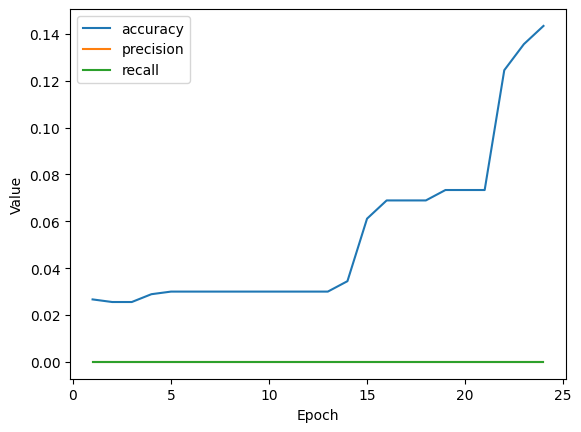

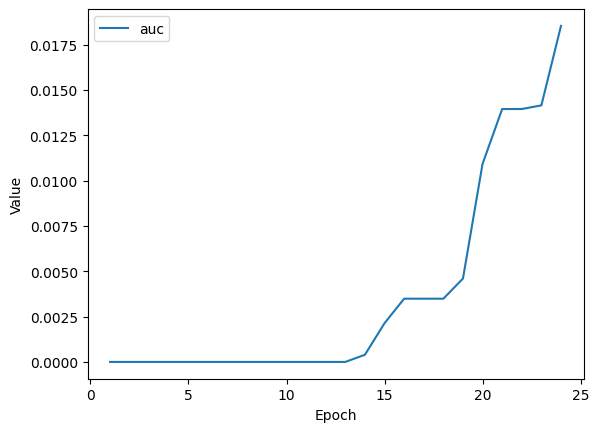

In [35]:
#@title Invoke the creating, training and plotting functions
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 25
batch_size = 100
label_name = "LABEL"
classification_threshold = 0.55

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                    threshold=classification_threshold),
           # Add precision and recall as metrics
           tf.keras.metrics.Precision(thresholds=classification_threshold,
                                      name='precision'),

           tf.keras.metrics.Recall(thresholds=classification_threshold,
                                      name='recall'),
           #summarize the model's perfomance
           tf.keras.metrics.AUC(num_thresholds=100, name='auc')

           ]

# Establish the models' topography.
my_model = create_model(inputs, learning_rate, METRICS)

# To view a PNG of this model's layers click File>'my_classification_model.png'
# file
tf.keras.utils.plot_model(my_model, "my_classification_model.png")

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm_with_label, epochs,
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy', 'precision', 'recall']

plot_curve(epochs, hist, list_of_metrics_to_plot)
#Accuracy should gradually improve during training
#(untill it can improve no more)

#plotting the auc curve(metrics vs epoch)
list_of_metric_to_plot2 = ['auc']
plot_curve(epochs, hist, list_of_metric_to_plot2)

In [36]:
#@title Evaluate the model against the test set
# Determine the model's accuracy against the test set.

features = {name:np.array(value) for name, value in test_df_norm_with_label.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

1/1 [==============================] - 1s 505ms/step - loss: 1.1313 - accuracy: 0.1700 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


[1.131264090538025, 0.17000000178813934, 0.0, 0.0, 0.0]

In [37]:
#@title Function to preprocess text input and make predictions for binary classification
def predict_example(model, text_processing_functions, classification_threshold, input_text):
    # Preprocess the input text using the same functions used to train the model
    processed_inputs = {}
    for text_processing_function in text_processing_functions:
        processed_inputs[text_processing_function.__name__] = np.array([text_processing_function(input_text)]).reshape(1, -1)

    # Make predictions using the trained model
    model_predictions = model.predict(processed_inputs)

    # Extract the predicted probability
    predicted_probability = model_predictions['dense'][0][0]

    # Convert probability to binary label (0 or 1) based on the specified threshold
    predicted_label = 1 if predicted_probability >= classification_threshold else 0

    return predicted_label

# Define the text processing functions
def detect_total_dash(text):
    return [len(re.findall(r'-', text))]

def detect_total_colons(text):
    return [len(re.findall(r':', text))]

def detect_total_number_apostrophe(text):
    return [len(re.findall(r"'", text))]

def detect_numbers_presence(text):
    return [np.array([1 if any(char.isdigit()) else 0]) for _ in text]


def detect_word_however_presence(text):
    return [1 if 'however' in text.lower() else 0]

def detect_word_inconclusion_presence(text):
    return [1 if 'conclusion' in text.lower() else 0]

# Define the input text
input_text = "This is a sample text for prediction."

# Define the text processing functions to use
text_processing_functions = [detect_total_dash, detect_total_colons, detect_total_number_apostrophe, detect_numbers_presence, detect_word_however_presence, detect_word_inconclusion_presence]

# Define the classification threshold
classification_threshold = 0.5

# Load the trained model
# model = tf.keras.models.load_model('path/to/trained/model.h5')

# Generate predictions for the input text
predicted_label = predict_example(my_model, text_processing_functions, classification_threshold, input_text)
print("Predicted Label:", predicted_label)

NameError: name 'char' is not defined